<a href="https://colab.research.google.com/github/Shrason/Projects/blob/main/EDA_AMEO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exploratory Data Analysis - Aspiring Mind Employment Outcome 2015 (AMEO)
The dataset was released by Aspiring Minds from the Aspiring Mind Employment Outcome 2015 (AMEO). The study is primarily limited  only to students with engineering disciplines. The dataset contains the employment outcomes of engineering graduates as dependent variables (Salary, Job Titles, and Job Locations) along with the standardized scores from three different areas – cognitive skills, technical skills and personality skills. The dataset also contains demographic features. The dataset  contains  around  40 independent variables and 4000 data points. The independent variables are both continuous and categorical in nature. The dataset contains a unique identifier for each candidate.

**Required Libraries Import**

---



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

**Data Loading** **and Data Information**

---



In [ ]:
data = pd.read_csv('/content/data.xlsx - Sheet1.csv')


In [ ]:
data.shape

(3998, 39)

In [ ]:
data.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000.0,6/1/12 0:00,present,senior quality engineer,Bangalore,f,2/19/90 0:00,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000.0,9/1/13 0:00,present,assistant manager,Indore,m,10/4/89 0:00,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000.0,6/1/14 0:00,present,systems engineer,Chennai,f,8/3/92 0:00,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000.0,7/1/11 0:00,present,senior software engineer,Gurgaon,m,12/5/89 0:00,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000.0,3/1/14 0:00,3/1/15 0:00,get,Manesar,m,2/27/91 0:00,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             3998 non-null   object 
 1   ID                     3998 non-null   int64  
 2   Salary                 3998 non-null   float64
 3   DOJ                    3998 non-null   object 
 4   DOL                    3998 non-null   object 
 5   Designation            3998 non-null   object 
 6   JobCity                3998 non-null   object 
 7   Gender                 3998 non-null   object 
 8   DOB                    3998 non-null   object 
 9   10percentage           3998 non-null   float64
 10  10board                3998 non-null   object 
 11  12graduation           3998 non-null   int64  
 12  12percentage           3998 non-null   float64
 13  12board                3998 non-null   object 
 14  CollegeID              3998 non-null   int64  
 15  Coll

**Data Cleaning**

---



-- Dropping the unwanted columns:





In [ ]:
data['Unnamed: 0'].value_counts()

train    3998
Name: Unnamed: 0, dtype: int64

In [ ]:
data.drop(['Unnamed: 0'], axis=1,inplace=True)

In [ ]:
data = data.set_index('ID')

In [ ]:
data.shape

(3998, 37)

-- Renaming the columns:

In [ ]:
data.columns

Index(['Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeID', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityID', 'CollegeCityTier', 'CollegeState', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

In [ ]:
data.columns = data.columns.str.lower()

In [ ]:
data.columns

Index(['salary', 'doj', 'dol', 'designation', 'jobcity', 'gender', 'dob',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'collegeid', 'collegetier', 'degree', 'specialization', 'collegegpa',
       'collegecityid', 'collegecitytier', 'collegestate', 'graduationyear',
       'english', 'logical', 'quant', 'domain', 'computerprogramming',
       'electronicsandsemicon', 'computerscience', 'mechanicalengg',
       'electricalengg', 'telecomengg', 'civilengg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

In [ ]:
data = data.rename(columns={'jobcity':'job_city', '10percentage':'10_percentage', '10board': '10_board',
                            '12graduation':'12_year','12percentage':'12_percentage','12board':'12_board','collegeid':'college_id',
                            'collegetier':'college_tier','collegegpa':'college_gpa','collegecityid':'college_city_id','collegestate':'college_state',
                            'collegecitytier':'college_city_tier','collegestate':'college_state','graduationyear':'graduation_year',
                            'computerprogramming':'computer_programming','electronicsandsemicon':'electronics_and_semicon','computerscience':'computer_science',
                            'mechanicalengg':'mechanical_engg','electricalengg':'electrical_engg','telecomengg':'telecom_engg','civilengg':'civil_engg'})

In [ ]:
data.columns

Index(['salary', 'doj', 'dol', 'designation', 'job_city', 'gender', 'dob',
       '10_percentage', '10_board', '12_year', '12_percentage', '12_board',
       'college_id', 'college_tier', 'degree', 'specialization', 'college_gpa',
       'college_city_id', 'college_city_tier', 'college_state',
       'graduation_year', 'english', 'logical', 'quant', 'domain',
       'computer_programming', 'electronics_and_semicon', 'computer_science',
       'mechanical_engg', 'electrical_engg', 'telecom_engg', 'civil_engg',
       'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

-- Converting columns into appropriate data type:

In [ ]:
data['doj'] = data['doj'].apply(pd.to_datetime)
data['dob'] = data['dob'].apply(pd.to_datetime)


In [ ]:
data['doj'].dtype
data['dob'].dtype

dtype('<M8[ns]')

In [ ]:
data['dol'].head()

ID
203097        present
579905        present
810601        present
267447        present
343523    3/1/15 0:00
Name: dol, dtype: object

In [ ]:
data['dol'] = data['dol'].replace('present',pd.to_datetime('today'))

In [ ]:
data['dol'] = data['dol'].apply(pd.to_datetime)

In [ ]:
data['dol'].dtype

dtype('<M8[ns]')

-- Checking for presence of any null values:

In [ ]:
data.isnull().any().any()

False

-- Checking for duplicate data if any:

In [ ]:
data.duplicated().any()

False

**Univariet Analysis**

---



-- Separating numerical and categorical data:

In [ ]:
data_categoric_feature = list(data.select_dtypes(include=['object']).columns)

In [ ]:
print(data_categoric_feature)

['designation', 'job_city', 'gender', '10_board', '12_board', 'degree', 'specialization', 'college_state']


In [ ]:
numeric_discrete = list(data.select_dtypes(include=['int64']).columns)

In [ ]:
print(numeric_discrete)

['12_year', 'college_id', 'college_tier', 'college_city_id', 'college_city_tier', 'graduation_year', 'english', 'logical', 'quant', 'computer_programming', 'electronics_and_semicon', 'computer_science', 'mechanical_engg', 'electrical_engg', 'telecom_engg', 'civil_engg']


In [ ]:
numeric_continuous = list(data.select_dtypes(include=['float64']).columns)

In [ ]:
print(numeric_continuous)

['salary', '10_percentage', '12_percentage', 'college_gpa', 'domain', 'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience']


** Statistical Non-Visual Analysis:

In [ ]:
def discrete_feature(discrete_feature):
  for col in discrete_feature:
    print('*'*5 , col , '*'*5)
    print(discrete_feature[col].agg(['count','nunique','unique']))
    print('value_count: \n', discrete_feature[col].value_counts())
    print()

In [ ]:
categoric_feature = data.select_dtypes(include=['object'])

In [ ]:
discrete_feature(categoric_feature)

***** designation *****
count                                                   3998
nunique                                                  419
unique     [senior quality engineer, assistant manager, s...
Name: designation, dtype: object
value_count: 
 software engineer                    539
software developer                   265
system engineer                      205
programmer analyst                   139
systems engineer                     118
                                    ... 
cad drafter                            1
noc engineer                           1
human resources intern                 1
senior quality assurance engineer      1
jr. software developer                 1
Name: designation, Length: 419, dtype: int64

***** job_city *****
count                                                   3998
nunique                                                  339
unique     [Bangalore, Indore, Chennai, Gurgaon, Manesar,...
Name: job_city, dtype: object
value_count: 


The 10th and 12th board column contains '0' value while job_city contain -1 value, thus ,the data is unknown.

In [ ]:
numeric_discrete_feature = data.select_dtypes(include=['int64'])

In [ ]:
discrete_feature(numeric_discrete_feature)

***** 12_year *****
count                                                   3998
nunique                                                   16
unique     [2007, 2010, 2008, 2009, 2006, 2011, 2005, 199...
Name: 12_year, dtype: object
value_count: 
 2009    1052
2008     935
2010     742
2007     528
2006     407
2005     160
2004      73
2011      46
2003      25
2002      14
2012      10
2001       2
1995       1
1998       1
2013       1
1999       1
Name: 12_year, dtype: int64

***** college_id *****
count                                                   3998
nunique                                                 1350
unique     [1141, 5807, 64, 6920, 11368, 5086, 314, 1757,...
Name: college_id, dtype: object
value_count: 
 272      94
64       38
11759    35
44       35
47       33
         ..
128       1
5068      1
8637      1
9361      1
4883      1
Name: college_id, Length: 1350, dtype: int64

***** college_tier *****
count        3998
nunique         2
unique     [2, 1]
Name: 

- Dropping the columns namely, college_id, college_city_id, college_tier and college_city_tier as not analysing based on these columns.


In [ ]:
numeric_discrete_feature = numeric_discrete_feature.drop(columns = ['college_id', 'college_city_id', 'college_tier','college_city_tier'])

- The columns namely, computer_programming,electronics_and_semicon, computer_science, mechanical_engg, electrical_engg, telecom_engg, and civil_engg contains '-1' value, representing lack of data input.

In [ ]:
def numeric_feature_stats(numeric_feature):
  for col in numeric_feature:
    print('*'*5 , col , '*'*5)
    print(numeric_feature[col].agg(['min','max','mean','median','std','skew','kurtosis']))
    print()

In [ ]:
numeric_continuous_feature = data.select_dtypes(include=['float64'])


In [ ]:
numeric_feature_stats(numeric_continuous_feature)

***** salary *****
min         3.500000e+04
max         4.000000e+06
mean        3.076998e+05
median      3.000000e+05
std         2.127375e+05
skew        6.451081e+00
kurtosis    8.093000e+01
Name: salary, dtype: float64

***** 10_percentage *****
min         43.000000
max         97.760000
mean        77.925443
median      79.150000
std          9.850162
skew        -0.591019
kurtosis    -0.110284
Name: 10_percentage, dtype: float64

***** 12_percentage *****
min         40.000000
max         98.700000
mean        74.466366
median      74.400000
std         10.999933
skew        -0.032607
kurtosis    -0.630737
Name: 12_percentage, dtype: float64

***** college_gpa *****
min          6.450000
max         99.930000
mean        71.486171
median      71.720000
std          8.167338
skew        -1.249209
kurtosis    10.234244
Name: college_gpa, dtype: float64

***** domain *****
min        -1.000000
max         0.999910
mean        0.510490
median      0.622643
std         0.468671
skew 

** Visual Analysis:

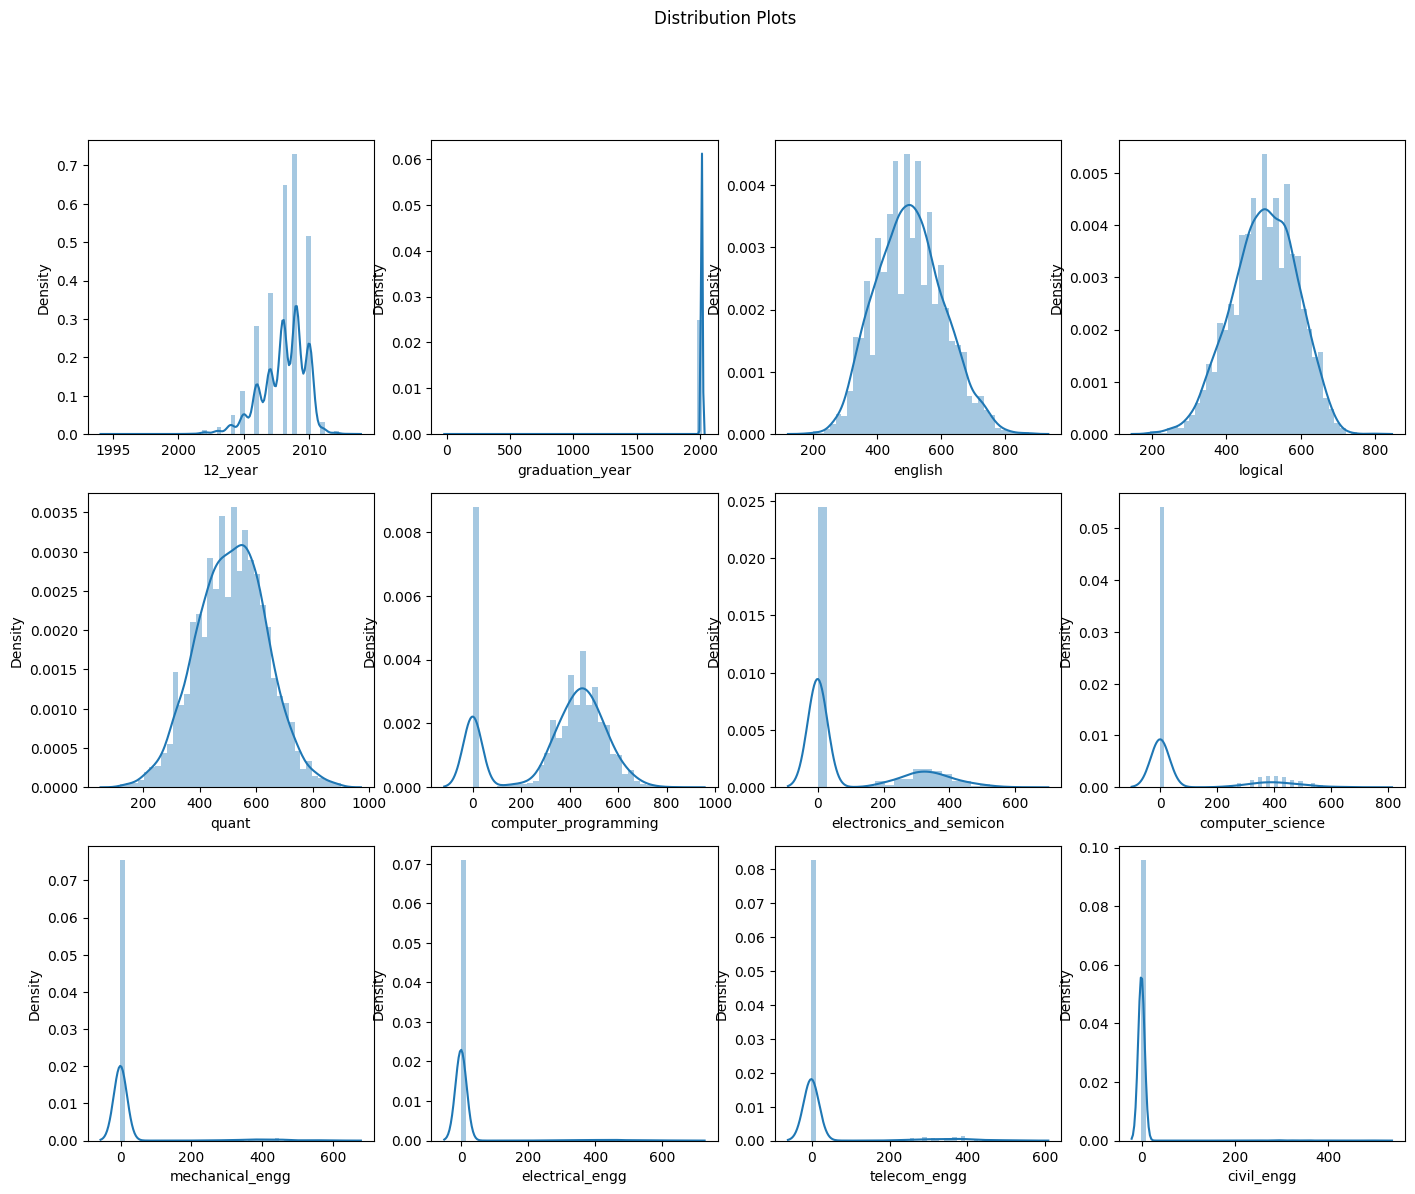

In [ ]:
fig, axes = plt.subplots(nrows=int(np.ceil(len(numeric_discrete_feature.columns) / 4)),
                         ncols=4, figsize=(17, 13))

for i, column in enumerate(numeric_discrete_feature.columns):
    row = int(i // 4)
    col = i % 4
    sns.distplot(numeric_discrete_feature[column], ax=axes[row, col])

fig.suptitle("Distribution Plots")

plt.show()

- The 12_year plot is left skewed.
- The graduation_year plot is concentrated around the year 2000.
- The columns namely, ‘english’, ‘logical’, and ‘quant’ shows bell shape curve plot.
- Other plots are more concentrated near 0 and below points.


12_year                       Axes(0.125,0.798085;0.227941x0.0819149)
graduation_year            Axes(0.398529,0.798085;0.227941x0.0819149)
english                    Axes(0.672059,0.798085;0.227941x0.0819149)
logical                       Axes(0.125,0.699787;0.227941x0.0819149)
quant                      Axes(0.398529,0.699787;0.227941x0.0819149)
computer_programming       Axes(0.672059,0.699787;0.227941x0.0819149)
electronics_and_semicon       Axes(0.125,0.601489;0.227941x0.0819149)
computer_science           Axes(0.398529,0.601489;0.227941x0.0819149)
mechanical_engg            Axes(0.672059,0.601489;0.227941x0.0819149)
electrical_engg               Axes(0.125,0.503191;0.227941x0.0819149)
telecom_engg               Axes(0.398529,0.503191;0.227941x0.0819149)
civil_engg                 Axes(0.672059,0.503191;0.227941x0.0819149)
dtype: object

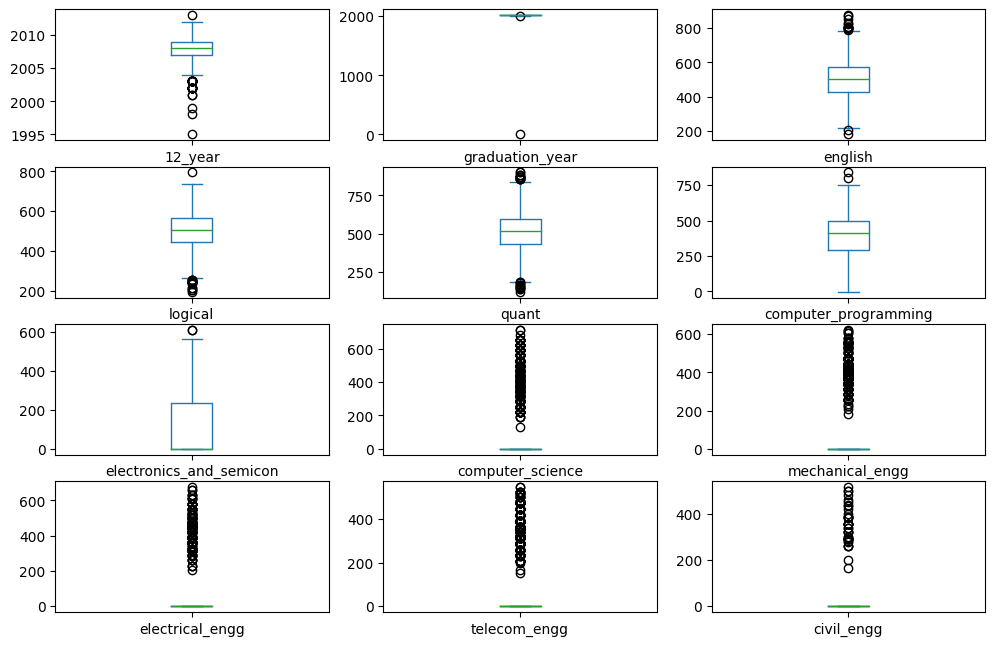

In [ ]:
numeric_discrete_feature.plot(kind='box', subplots=True, layout=(8, 3), figsize=(12, 16))

- All the plots contains outliers.
- The columns namely, computer_science, mechanical_engg, electrical_engg, telecom_engg, cvil_engg contains many outlier, due presence of high value count for -1 value.

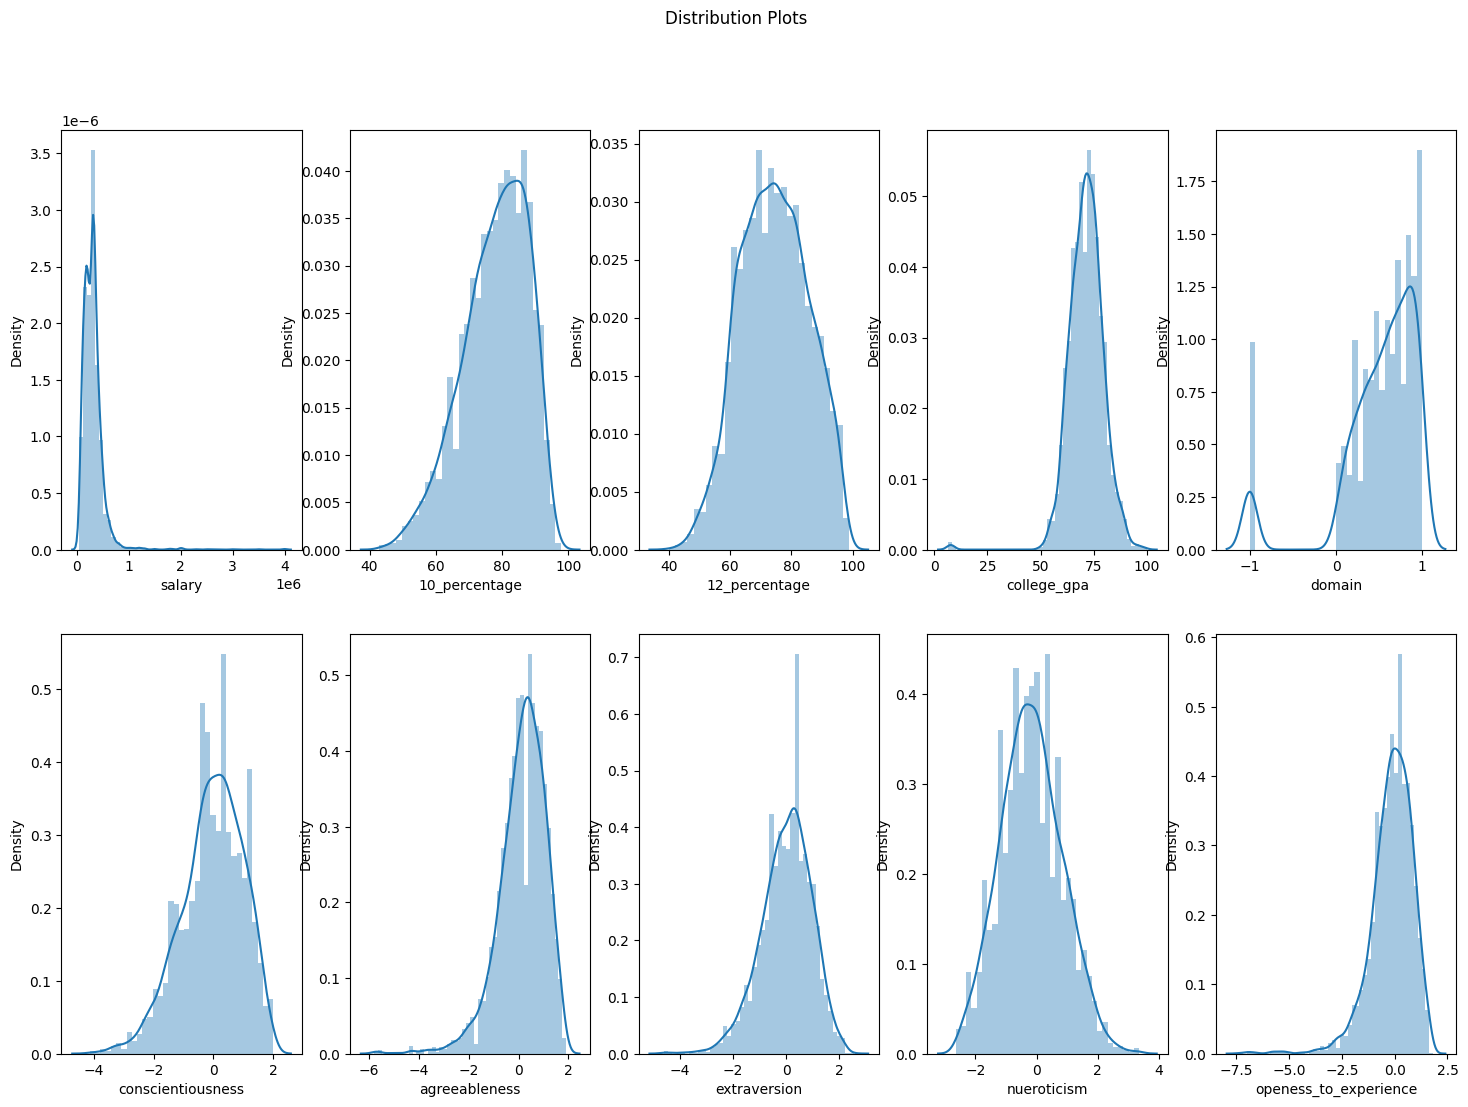

In [ ]:
fig, axes = plt.subplots(nrows=int(np.ceil(len(numeric_continuous_feature.columns) / 5)),
                         ncols=5, figsize=(18, 12))

for i, column in enumerate(numeric_continuous_feature.columns):
    row = int(i // 5)
    col = i % 5
    sns.distplot(numeric_continuous_feature[column], ax=axes[row, col])

fig.suptitle("Distribution Plots")

plt.show()

- **Normal Graphs**: nueroticism,extraversion, 12_percentage, college_gpa
- **Left Skewed**: domain,openess_to_experience agreeableness,conscientiousness, 10_percentage
- **Right Skewed**: salary

salary                      Axes(0.125,0.798085;0.352273x0.0819149)
10_percentage            Axes(0.547727,0.798085;0.352273x0.0819149)
12_percentage               Axes(0.125,0.699787;0.352273x0.0819149)
college_gpa              Axes(0.547727,0.699787;0.352273x0.0819149)
domain                      Axes(0.125,0.601489;0.352273x0.0819149)
conscientiousness        Axes(0.547727,0.601489;0.352273x0.0819149)
agreeableness               Axes(0.125,0.503191;0.352273x0.0819149)
extraversion             Axes(0.547727,0.503191;0.352273x0.0819149)
nueroticism                 Axes(0.125,0.404894;0.352273x0.0819149)
openess_to_experience    Axes(0.547727,0.404894;0.352273x0.0819149)
dtype: object

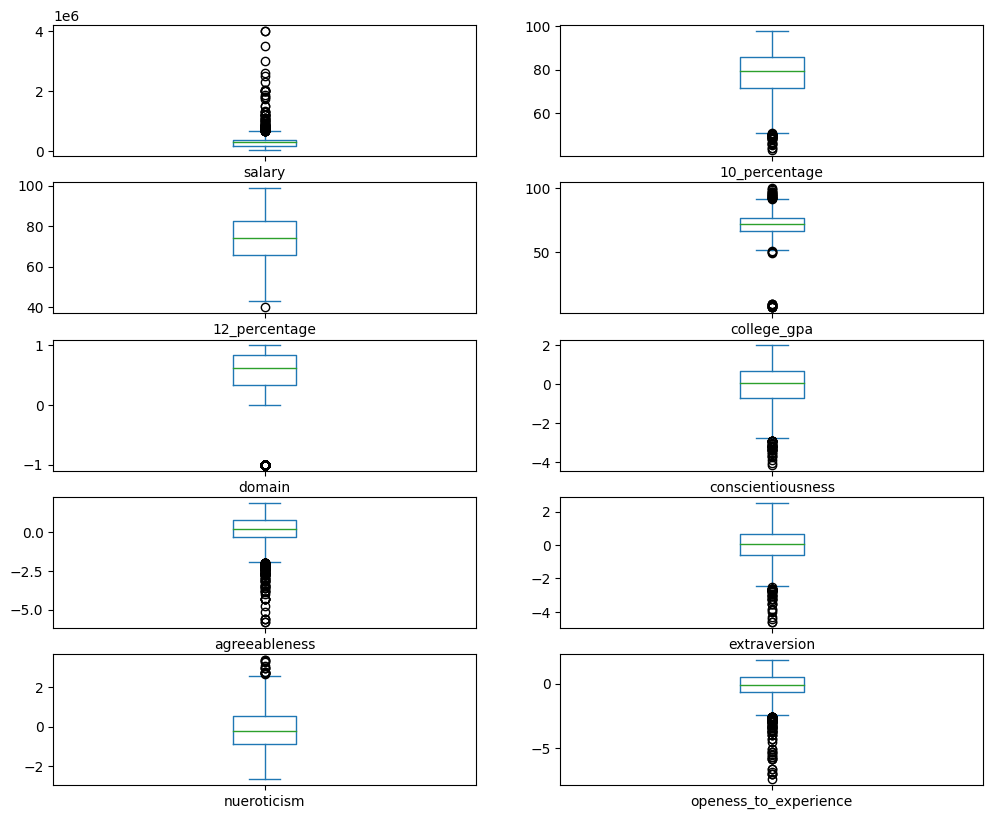

In [ ]:
numeric_continuous_feature.plot(kind = 'box', subplots=True, layout=(8, 2), figsize=(12, 16))

- All the columns have outliers.

In [ ]:
data = data.loc[data['salary'] < 1000000]

**Bivariate Analysis**

---



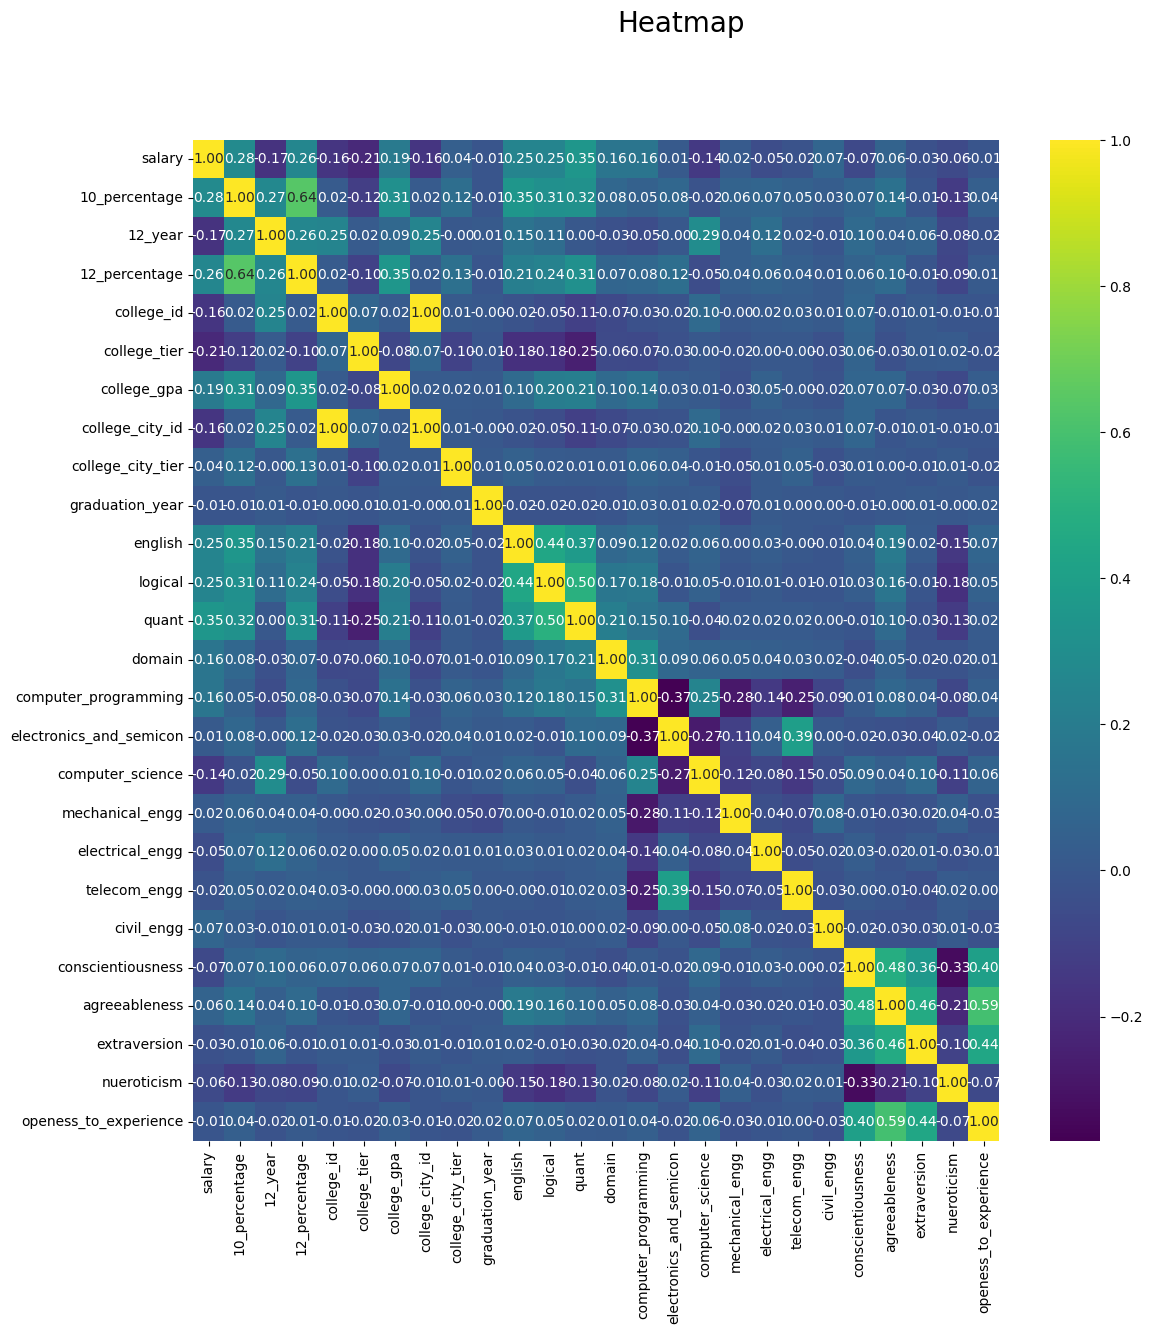

In [ ]:
f,ax = plt.subplots(figsize=(13,13))
corr= data.corr()
hm=sns.heatmap(round(corr,2),annot=True,cmap='viridis',fmt='.2f')
t=f.suptitle('Heatmap',fontsize=20)

- With salary as the target veriable, the high correlation with other varients are: 10_percentage, 12_percentage, college_gpa, english, logical, quant scores, domain, and computer_programming.

**Categorical Data Vs. Categorical Data

In [ ]:
gen_degree = pd.crosstab(data['degree'],data['gender'])
degree_by_gen = gen_degree.sort_values(by='m',ascending=False)
degree_by_gen

gender,f,m
degree,,
B.Tech/B.E.,884,2782
MCA,57,183
M.Tech./M.E.,8,43
M.Sc. (Tech.),1,1


<Axes: xlabel='degree'>

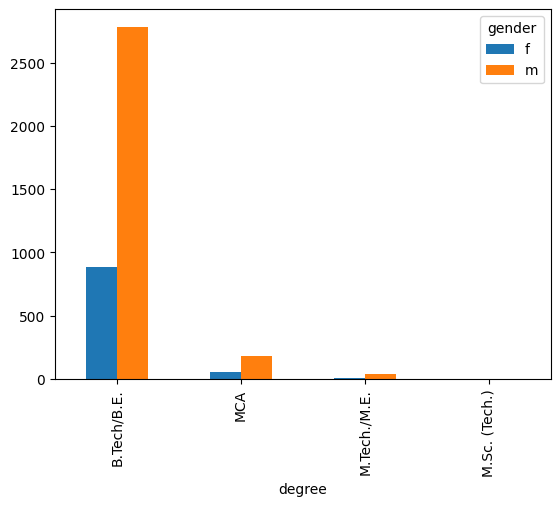

In [ ]:
degree_by_gen.plot.bar()

- The most prefered degree both in male and female is B.Tech/B.E compared to other degrees.
- Compare to female students number of male students are more for all degrees except M.Sc.(Tech.).

** Categorical Data Vs. Numerical Data:

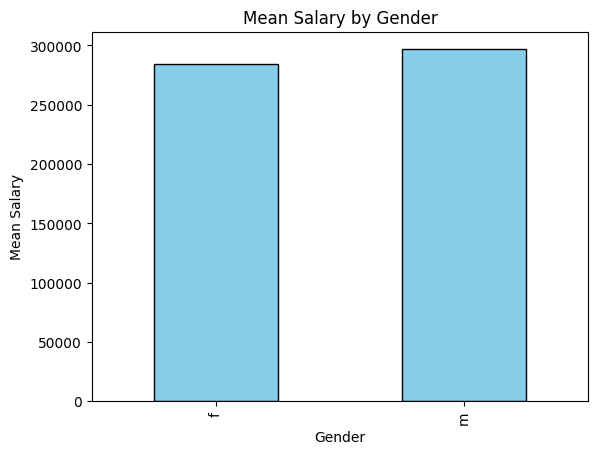

In [ ]:
mean_salary_by_degree = data.groupby('gender')['salary'].mean()
mean_salary_by_degree.plot.bar(x='gender', y='salary', color='skyblue', edgecolor='black')
plt.xlabel('Gender')
plt.ylabel('Mean Salary')
plt.title('Mean Salary by Gender')
plt.show()

- Both the gender earns similar salary.  

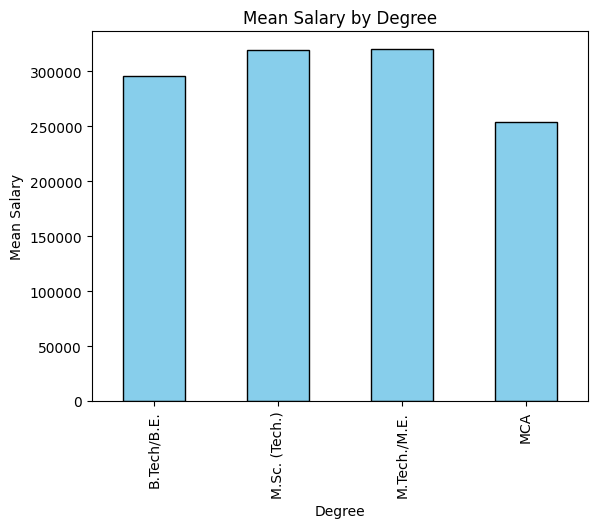

In [ ]:
mean_salary_by_degree = data.groupby('degree')['salary'].mean()
mean_salary_by_degree.plot.bar(x='degree', y='salary', color='skyblue', edgecolor='black')
plt.xlabel('Degree')
plt.ylabel('Mean Salary')
plt.title('Mean Salary by Degree')
plt.show()

- Students with M.Sc(Tech.) and M.Tech/M.E earns similar high salary compared to other degrees.
- But number of students with degree in M.SC.(Tech.) are only 2 and in M.Tech./M.E. are 51 out of 4000 students. Thus, these are exceptions.

<Axes: ylabel='job_city'>

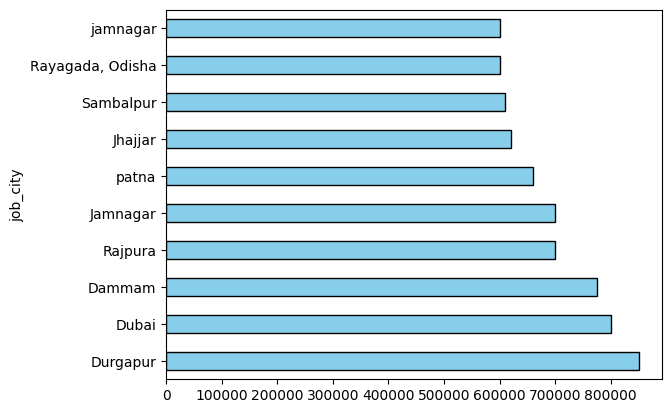

In [ ]:
mean_salary_by_degree = data.groupby('job_city')['salary'].mean()
top_10_city = mean_salary_by_degree.sort_values(ascending=False)
top_10_city.head(10).plot.barh(x='top_10_city', y='salary', color='skyblue', edgecolor='black')


In [ ]:
durgapur_city = data.loc[data['job_city']== 'Durgapur']
durgapur_city.head()

,salary,doj,dol,designation,job_city,gender,dob,10_percentage,10_board,12_year,...,computer_science,mechanical_engg,electrical_engg,telecom_engg,civil_engg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
ID,,,,,,,,,,,,,,,,,,,,,
38032,850000.0,2010-07-01,2024-02-23 03:49:53.370129,assistant manager,Durgapur,m,1985-12-21,89.4,icse,2005,...,-1,446,-1,-1,-1,0.2009,0.0328,0.2366,-0.8778,0.1864


- As per plot Durgapur city student earns highest salary but only one student is earning high salary compared to others. Thus, this is exception.


In [ ]:
mean_salary_by_designation = data.groupby('designation')['salary'].mean()

<Axes: ylabel='designation'>

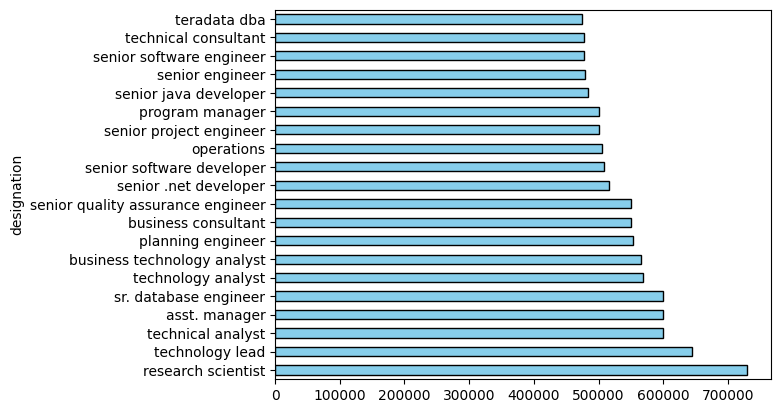

In [ ]:
degination_top_20 = mean_salary_by_designation.sort_values(ascending=False)
degination_top_20.head(20).plot.barh(x='degination_top_20', y='salary', color='skyblue', edgecolor='black')

In [ ]:
designation_1 = data.loc[data['designation']== 'research scientist']
designation_1.head()

,salary,doj,dol,designation,job_city,gender,dob,10_percentage,10_board,12_year,...,computer_science,mechanical_engg,electrical_engg,telecom_engg,civil_engg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
ID,,,,,,,,,,,,,,,,,,,,,
231229,730000.0,2013-07-01,2024-02-23 03:49:53.370129,research scientist,Pune,m,1989-11-15,84.67,0,2006,...,-1,-1,-1,-1,-1,-1.3447,-1.0593,0.672,1.0024,-1.7093


- As per plot designation 'research scientist' is paid high salary but only one student is earning high salary compared to others. Thus, this is exception.


<Axes: ylabel='specialization'>

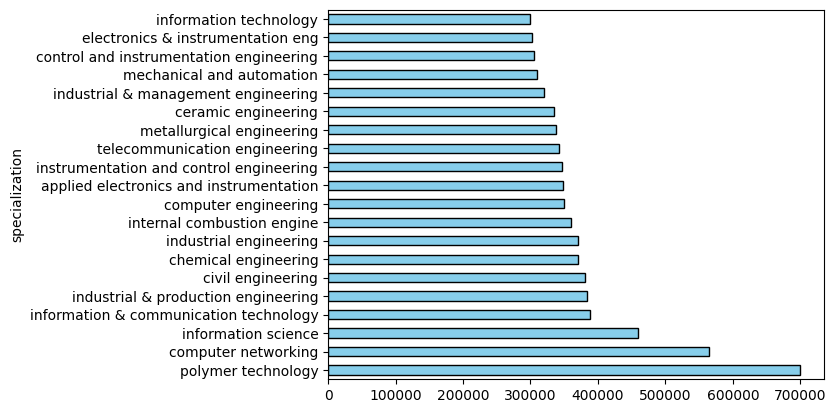

In [ ]:
mean_salary_by_specialization = data.groupby('specialization')['salary'].mean()
specialization_top_20 = mean_salary_by_specialization.sort_values(ascending=False)
specialization_top_20.head(20).plot.barh(x='specialization_top_20', y='salary', color='skyblue', edgecolor='black')

In [ ]:
specialization_1 = data.loc[data['specialization']== 'polymer technology']
specialization_1.head()

,salary,doj,dol,designation,job_city,gender,dob,10_percentage,10_board,12_year,...,mechanical_engg,electrical_engg,telecom_engg,civil_engg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,experience
ID,,,,,,,,,,,,,,,,,,,,,
962376,700000.0,2014-07-01,2024-02-23 03:49:53.370129,product manager,Jaipur,m,1992-01-03,87.4,cbse,2009,...,-1,-1,-1,-1,-0.3027,-0.4536,-0.6048,-0.8682,0.0973,9.7


- As per plot specialization in 'polymer technology' is paid high salary but only one student is earning high salary compared to others.Thus, this is exception.

** Numerical Data Vs. Numerical Data:

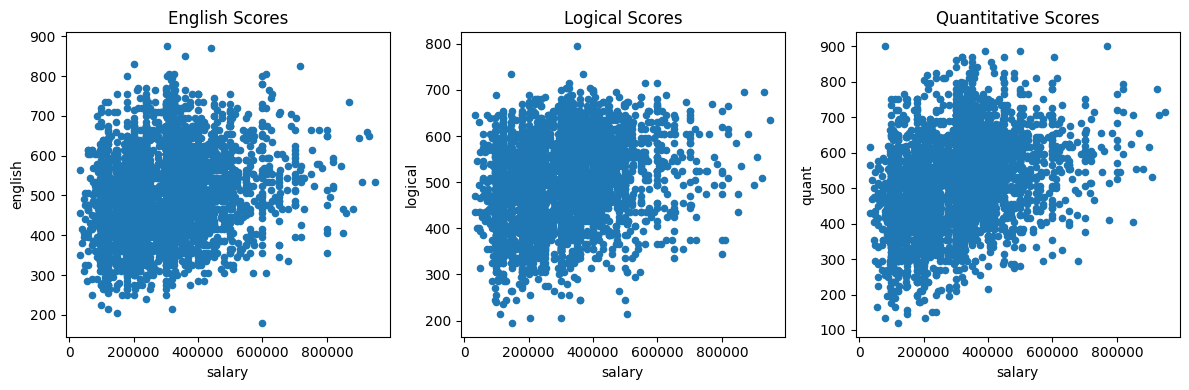

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

data.plot(kind='scatter', x='salary', y='english', ax=axes[0])
axes[0].set_title('English Scores')

data.plot(kind='scatter', x='salary', y='logical', ax=axes[1])
axes[1].set_title('Logical Scores')

data.plot(kind='scatter', x='salary', y='quant', ax=axes[2])
axes[2].set_title('Quantitative Scores')

plt.tight_layout()
plt.show()

- Students scoring in range 400-700 in english, logical and quantitative test majorly earn salary around 600000.
- With excluding few exceptions, english, logical and quantitative scores has no influence on salary earned as high score i.e 700 and low score i.e 400 both are earning upto 600000.  

In [ ]:
numeric_discrete_feature.columns

Index(['12_year', 'graduation_year', 'english', 'logical', 'quant',
       'computer_programming', 'electronics_and_semicon', 'computer_science',
       'mechanical_engg', 'electrical_engg', 'telecom_engg', 'civil_engg'],
      dtype='object')

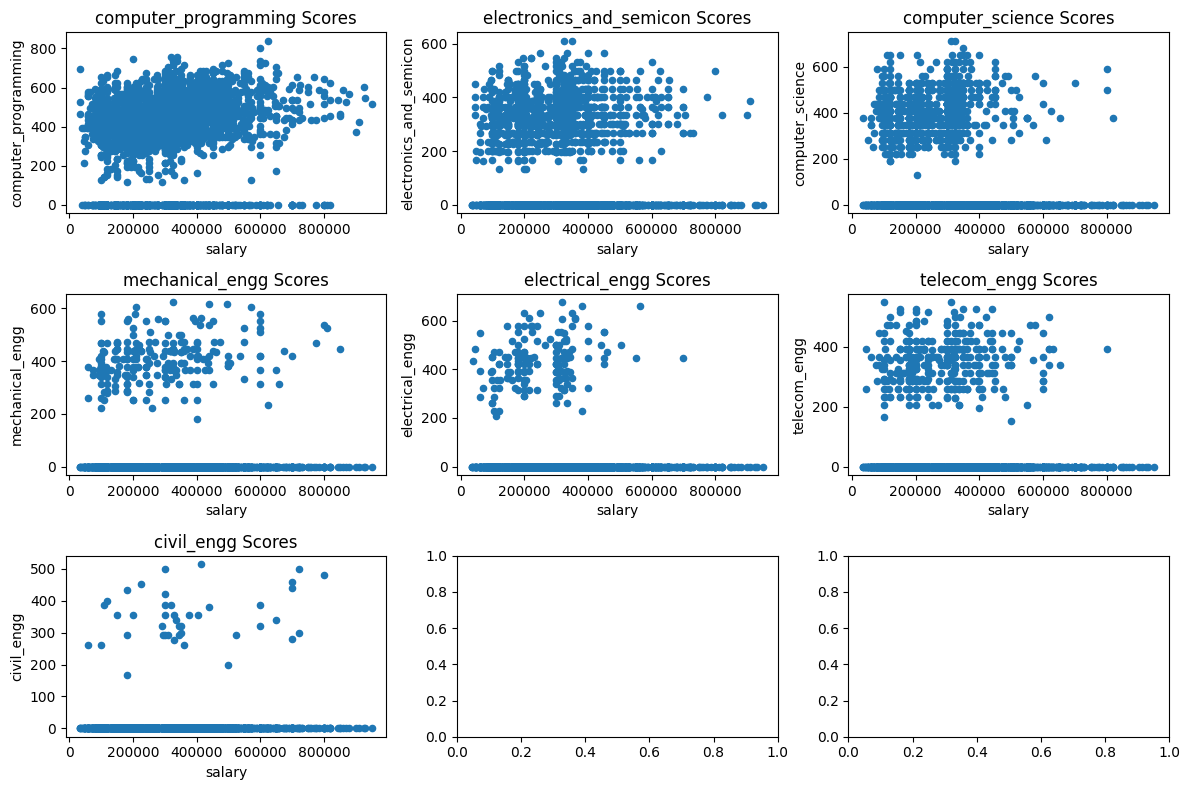

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(12, 8))

data.plot(kind='scatter', x='salary', y='computer_programming', ax=axes[0,0])
axes[0,0].set_title('computer_programming Scores')

data.plot(kind='scatter', x='salary', y='electronics_and_semicon', ax=axes[0,1])
axes[0,1].set_title('electronics_and_semicon Scores')

data.plot(kind='scatter', x='salary', y='computer_science', ax=axes[0,2])
axes[0,2].set_title('computer_science Scores')

data.plot(kind='scatter', x='salary', y='mechanical_engg', ax=axes[1,0])
axes[1,0].set_title('mechanical_engg Scores')

data.plot(kind='scatter', x='salary', y='electrical_engg', ax=axes[1,1])
axes[1,1].set_title('electrical_engg Scores')

data.plot(kind='scatter', x='salary', y='telecom_engg', ax=axes[1,2])
axes[1,2].set_title('telecom_engg Scores')

data.plot(kind='scatter', x='salary', y='civil_engg', ax=axes[2,0])
axes[2,0].set_title('civil_engg Scores')


plt.tight_layout()
plt.show()

- Most of the data points in all the 'computer_programming','electronics_and_semicon', 'computer_science','mechanical_engg', 'electrical_engg', 'telecom_engg', 'civil_engg' scores are concerntrated between 100000-600000 salary range.
- High score in 'computer_programming','electronics_and_semicon', 'computer_science','mechanical_engg', 'electrical_engg', 'telecom_engg', 'civil_engg' does not necessarily lead to high salary.

In [ ]:
numeric_continuous_feature.columns

Index(['salary', '10_percentage', '12_percentage', 'college_gpa', 'domain',
       'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

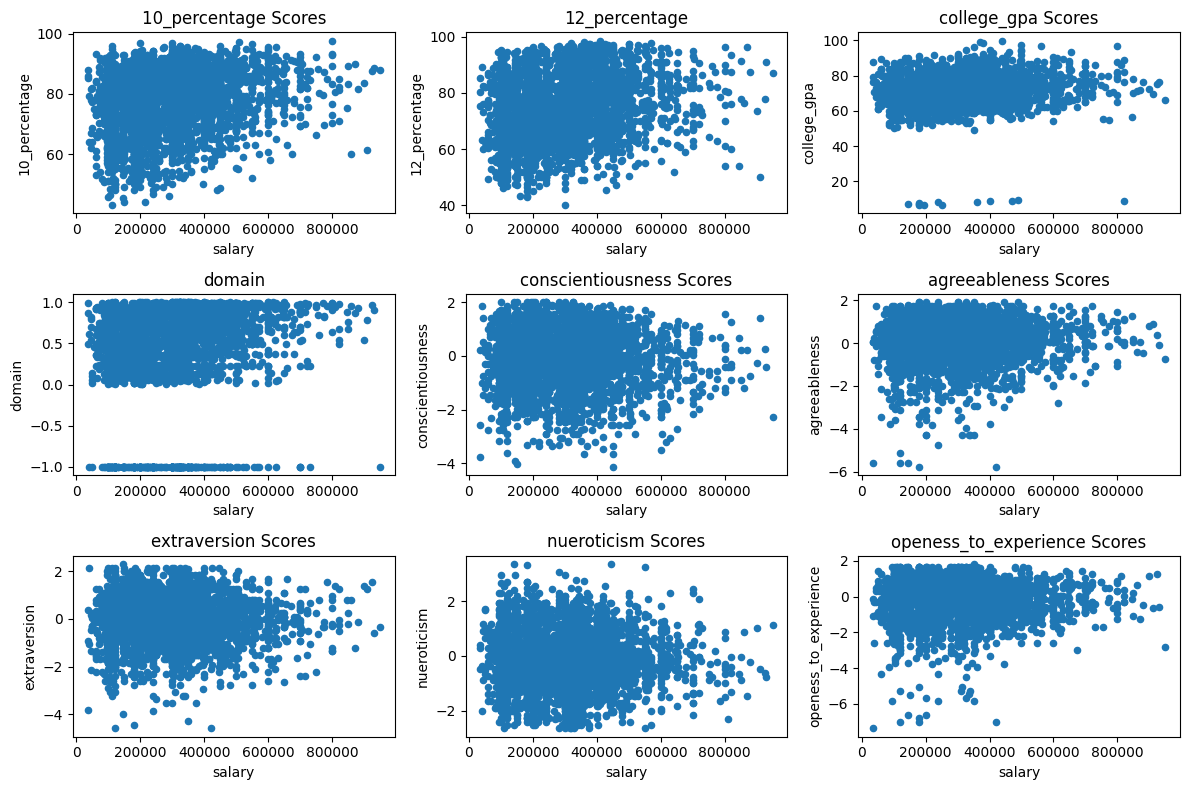

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(12, 8))

data.plot(kind='scatter', x='salary', y='10_percentage', ax=axes[0,0])
axes[0,0].set_title('10_percentage Scores')

data.plot(kind='scatter', x='salary', y='12_percentage', ax=axes[0,1])
axes[0,1].set_title('12_percentage')

data.plot(kind='scatter', x='salary', y='college_gpa', ax=axes[0,2])
axes[0,2].set_title('college_gpa Scores')

data.plot(kind='scatter', x='salary', y='domain', ax=axes[1,0])
axes[1,0].set_title('domain')

data.plot(kind='scatter', x='salary', y='conscientiousness', ax=axes[1,1])
axes[1,1].set_title('conscientiousness Scores')

data.plot(kind='scatter', x='salary', y='agreeableness', ax=axes[1,2])
axes[1,2].set_title('agreeableness Scores')

data.plot(kind='scatter', x='salary', y='extraversion', ax=axes[2,0])
axes[2,0].set_title('extraversion Scores')

data.plot(kind='scatter', x='salary', y='nueroticism', ax=axes[2,1])
axes[2,1].set_title('nueroticism Scores')

data.plot(kind='scatter', x='salary', y='openess_to_experience', ax=axes[2,2])
axes[2,2].set_title('openess_to_experience Scores')



plt.tight_layout()
plt.show()

- Scoring above 60 percentage in 10th and 12th, also collage gpa above 60 score, majorly falls in earning salary in range 100000 - 600000.
- In domain high score does lead to 600000 salary.
- In conscientiousness, agrreableness, extraversion, nueroticism and openess_to_experience students scoreing negative socre are also earning around 600000 salary.
- Thus,scoring high in 10th, 12th, collage gpa, conscientiousness, agrreableness, extraversion, nueroticism and openess_to_experience does not necessarily lead to high salary.

**Research Question 1.**	Times of India article dated Jan 18, 2019 states that “After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.” Test this claim with the data given to you.


In [ ]:
data['experience']=((data['dol']-data['doj']).map(lambda x: round(x.days/365,1)))

In [ ]:
df = data[['specialization','designation','salary', 'experience']]

In [ ]:
df1 = df.loc[df['specialization'] == 'computer engineering']

In [ ]:
list = ['programming analyst','software engineer', 'hardware engineer', 'associate engineer']
df2 = df1.loc[df1['designation'].isin(list)]

In [ ]:
df3 = df2.loc[df2['experience'] <= 1.0]

In [ ]:
df3

,specialization,designation,salary,experience
ID,,,,
311404,computer engineering,software engineer,180000.0,1.0
1035913,computer engineering,software engineer,110000.0,-0.7
669934,computer engineering,software engineer,200000.0,0.9
600997,computer engineering,software engineer,240000.0,0.8
796197,computer engineering,software engineer,800000.0,0.8
556005,computer engineering,software engineer,300000.0,0.8
133296,computer engineering,software engineer,145000.0,0.6
582739,computer engineering,software engineer,325000.0,0.4
218077,computer engineering,software engineer,200000.0,0.8


In [ ]:
df4 = df.loc[df['specialization'] == 'computer science & engineering']
df5 = df4.loc[df4['designation'].isin(list)]
df6 = df5.loc[df5['experience'] <= 1.0]
df6

,specialization,designation,salary,experience
ID,,,,
1094324,computer science & engineering,software engineer,340000.0,0.7
827550,computer science & engineering,software engineer,375000.0,0.8
862250,computer science & engineering,software engineer,210000.0,0.7
1084021,computer science & engineering,software engineer,300000.0,0.9
896469,computer science & engineering,software engineer,475000.0,0.4
845544,computer science & engineering,software engineer,300000.0,0.5
340628,computer science & engineering,software engineer,300000.0,0.9
1101730,computer science & engineering,software engineer,370000.0,1.0
1224952,computer science & engineering,software engineer,325000.0,0.3


In [ ]:
data['designation'].isin(list).any()

True

- Yes, after doing your Computer Science Engineering if you take up jobs Software Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.

**Research Question 2.** Is there a relationship between gender and specialization? (i.e. Does the preference of Specialisation depend on the Gender?)


In [ ]:
gen_specialized = pd.crosstab(data['specialization'], data['gender'])
observed = gen_specialized.sort_values(by=['m'],ascending=False)
observed

gender,f,m
specialization,,
electronics and communication engineering,211,664
computer science & engineering,181,557
information technology,173,482
computer engineering,173,419
mechanical engineering,10,185
computer application,58,183
electronics and electrical engineering,34,160
electronics & telecommunications,28,93
electrical engineering,16,65


- Yes, preference of Specialisation depend on the Gender.Female students din't prefer at all for few specialization for example, electonics and computer engineering, metallurgical engineering, electrical and power engineering.  

<Axes: xlabel='specialization'>

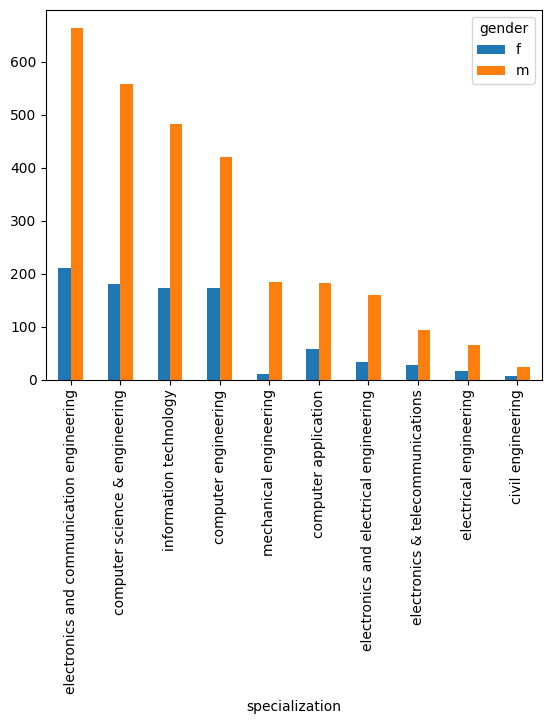

In [ ]:
observed[:10].plot.bar()

- Both male and female prefer specialization in electronics and comuunication engineering followed by computer science and engineering.


**Research Question 3.** As per the value count of categorical data , the most opt values are as below:


*   10,12 board - CBSE
*   degree - B.Tech/B.E.
*   specialization - electronic & communication engineering
*   designation - software engineer
*   job_city - Banglore

Does students who complete their 10,12 board from cbse, degree in B.tech, specialization in electronic and communication engineering, joining at software engineer designation in banglore earns around 600000.






In [ ]:
filtered_data_1 = data[
    (data['10_board'] == 'cbse')
]

In [ ]:
filtered_data_1[['10_board','12_board','degree','specialization','designation','job_city','salary']]

,10_board,12_board,degree,specialization,designation,job_city,salary
ID,,,,,,,
579905,cbse,cbse,B.Tech/B.E.,electronics and communication engineering,assistant manager,Indore,500000.0
810601,cbse,cbse,B.Tech/B.E.,information technology,systems engineer,Chennai,325000.0
343523,cbse,cbse,B.Tech/B.E.,electronics and communication engineering,get,Manesar,200000.0
912934,cbse,cbse,B.Tech/B.E.,mechanical engineering,mechanical engineer,Bangalore,400000.0
552574,cbse,cbse,B.Tech/B.E.,electronics and electrical engineering,electrical engineer,Noida,600000.0
...,...,...,...,...,...,...,...
1077872,cbse,cbse,B.Tech/B.E.,computer science & engineering,software engineer,Gurgaon,220000.0
305041,cbse,cbse,B.Tech/B.E.,computer engineering,software engineer,Gurgaon,480000.0
358393,cbse,cbse,B.Tech/B.E.,computer engineering,system engineer,Gurgaon,430000.0


In [ ]:
filtered_data_2 = filtered_data_1[
    (data['degree'] == 'B.Tech/B.E.')
]

filtered_data_3 = filtered_data_2[
    (data['specialization'] == 'electronics and communication engineering')
]

filtered_data_4 = filtered_data_3[
    (data['designation'] == 'software engineer')
]

filtered_data_5 = filtered_data_4[
    (data['job_city'] == 'Bangalore')
]

filtered_data_6 = filtered_data_5[
    (data['12_board'] == 'cbse')
]

In [ ]:
filtered_data_6[['10_board','12_board','degree','specialization','designation','job_city','salary', 'experience']]

,10_board,12_board,degree,specialization,designation,job_city,salary,experience
ID,,,,,,,,
1068768,cbse,cbse,B.Tech/B.E.,electronics and communication engineering,software engineer,Bangalore,400000.0,10.0
634935,cbse,cbse,B.Tech/B.E.,electronics and communication engineering,software engineer,Bangalore,180000.0,10.0


- Only two students out of 4000 have completed their 10 and 12 board in cbse board, after which they took B.Tech/B.E., did specialization in electronics and communication engineering, worked at designation software engineer and in job city Banglore.
- Both have 10 years experience still earning less than 600000.
- Thus, following this path dosen't lead to high salary.

**Satistical Test**

---



Chi square test

Statement - Yes, preference of ***Specialisation*** depend on the ***Gender***

Null Hypothesis: They are Independent

Alternate Hypothesis: They are Dependent

In [ ]:
from scipy.stats import chi2
from scipy.stats import chi2_contingency

In [ ]:
#chi2_contigency returns chi2 test statistic, p-value, degree of freedoms, expected frequencies
chi2_contingency(gen_specialized)

Chi2ContingencyResult(statistic=103.8392101371864, pvalue=1.504060447321969e-06, dof=45, expected_freq=array([[7.19878757e-01, 2.28012124e+00],
       [2.15963627e+00, 6.84036373e+00],
       [1.19979793e+00, 3.80020207e+00],
       [4.79919172e-01, 1.52008083e+00],
       [3.59939379e+00, 1.14006062e+01],
       [2.39959586e-01, 7.60040414e-01],
       [2.15963627e+00, 6.84036373e+00],
       [6.95882799e+00, 2.20411720e+01],
       [2.39959586e-01, 7.60040414e-01],
       [5.78302602e+01, 1.83169740e+02],
       [1.42056075e+02, 4.49943925e+02],
       [2.39959586e-01, 7.60040414e-01],
       [4.79919172e-01, 1.52008083e+00],
       [1.77090174e+02, 5.60909826e+02],
       [1.43975751e+00, 4.56024249e+00],
       [2.39959586e-01, 7.60040414e-01],
       [4.79919172e-01, 1.52008083e+00],
       [1.94367264e+01, 6.15632736e+01],
       [2.39959586e-01, 7.60040414e-01],
       [7.43874716e+00, 2.35612528e+01],
       [2.90351099e+01, 9.19648901e+01],
       [2.09964638e+02, 6.65035362e+

In [ ]:
#Computing chi2 test statistic, p-value, degree of freedoms

chi2_test_stat = chi2_contingency(observed)[0]
pval = chi2_contingency(observed)[1]
dof = chi2_contingency(observed)[2]

In [ ]:
confidence_level = 0.90

alpha = 1 - confidence_level

chi2_critical = chi2.ppf(1 - alpha, dof)

chi2_critical

57.50530474499599

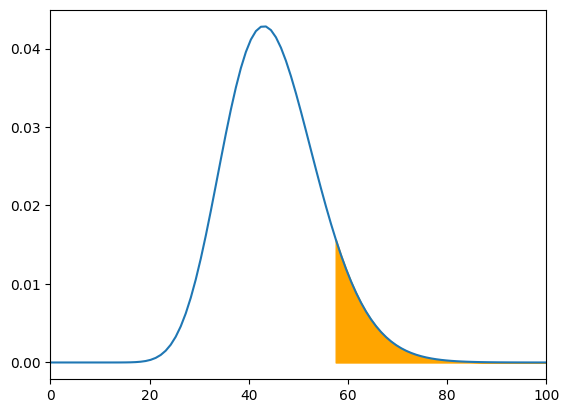

In [ ]:
# Ploting the chi2 distribution to visualise

# Defining the x minimum and x maximum
x_min = 0
x_max = 100

# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = chi2.pdf(x, dof)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Setting Chi2 Critical value
chi2_critical_right = chi2_critical

# Shading the right rejection region
x1 = np.linspace(chi2_critical_right, x_max, 100)
y1 = chi2.pdf(x1, dof)
plt.fill_between(x1, y1, color='orange')

In [ ]:
if(chi2_test_stat > chi2_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")

Reject Null Hypothesis


In [ ]:
if(pval < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")

Reject Null Hypothesis


- From this statistical test it is proved that specialization is dependent on gender.

**Overall Observation**

---



- The most prefered degree both in male and female is B.Tech/B.E.
- Female students number compared to number of male students are less for all degrees except M.Sc.(Tech.).
- Both the gender earns similar salary.
- Students scoring in range 400-700 in english, logical and quantitative test majorly earn salary around 600000.
- With excluding few exceptions, english, logical and quantitative scores has no influence on salary earned as high score i.e 700 and low score i.e 400 both are earning upto 600000.
- High score in 'computer_programming','electronics_and_semicon', 'computer_science','mechanical_engg', 'electrical_engg', 'telecom_engg', 'civil_engg' does not necessarily lead to high salary.
Thus, students scoring high in 10th, 12th, collage gpa, conscientiousness, agrreableness, extraversion, nueroticism and openess_to_experience does not necessarily earn high salary i.e. upto 600000.
- After doing your Computer Science Engineering if you take up jobs Software Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.
- Preference of Specialisation depend on the Gender.
- Following path - 10 and 12 board in cbse board, then completing degree in B.Tech/B.E.,specialization in electronics and communication engineering, working at designation software engineer and in job city Banglore dosen't lead to high salary i. e around 600000.


Note: The columns namely, computer_programming,electronics_and_semicon, computer_science, mechanical_engg, electrical_engg, telecom_engg, and civil_engg contains '-1' value, representing lack of data input. The outilers are not treated for this analysis, thus futher outlier can be treated to get more precise analysis.

**Conclusion**

---



- B.Tech/B.E is the popular option of students.
- Earning high salary is not gender biased.
- Scoring high in subjects does not necessarily lead to high salary job.
- Preference of Specialisation depend on the Gender.
- Software Engineer freshers can earn 2.5-3 lakhs.



---

